# Analysis Project: Picogreen Yield vs. User

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Picogreen yield (pg)", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Picogreen yield (pg),PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,NaN,18.0,pass,x
1,170104,P1,5,NaN,18.0,pass,x
2,170104,P1,5,NaN,18.0,pass,x
3,170104,P1,5,NaN,18.0,pass,x
4,170104,P1,5,NaN,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["User", "Picogreen yield (pg)", "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Picogreen yield (pg),PCR cycles,SM_QC_PF
3809,2017-09-06,P2,7,11558.52,21.0,pass
3810,2017-09-06,P2,7,13476.13,21.0,pass
3811,2017-09-08,P2,7,12861.93,21.0,pass
3812,2017-09-08,P2,7,14560.27,21.0,pass
3813,2017-09-08,P9,7,4516.30,21.0,fail


In [5]:
ps.tail()

,Date,User,Rig #,Picogreen yield (pg),PCR cycles,SM_QC_PF
5034,2018-01-16,PA,7,20826.00,21.0,pass
5035,2018-01-16,PA,7,14127.69,21.0,pass
5036,2018-01-16,PA,7,14066.83,21.0,pass
5037,2018-01-17,P8,4,16677.04,21.0,pass
5038,2018-01-17,P8,4,13472.42,21.0,fail


## Info

In [6]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 3809 to 5038
Data columns (total 6 columns):
Date                    1181 non-null datetime64[ns]
User                    1181 non-null category
Rig #                   1169 non-null category
Picogreen yield (pg)    1181 non-null float64
PCR cycles              1181 non-null category
SM_QC_PF                1181 non-null category
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 33.4 KB


In [7]:
ps.User.value_counts()

P8     344
P9     284
P2     203
PB     181
PA     137
P6      32
P6       0
P5       0
P3       0
P1       0
P0       0
Name: User, dtype: int64

## Swarmplot, Violinplot & Boxplot of Picogreen Yield vs User

Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)

No data for P1 because Kristen was out during that period.

Restricted yield below 100000 (1 large outliers: 200000)

Data: 9/06/17-Present(2018)

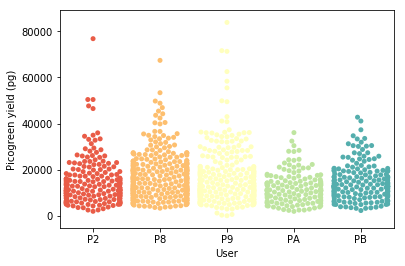

In [8]:
sp = sns.swarmplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                    order = ["P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

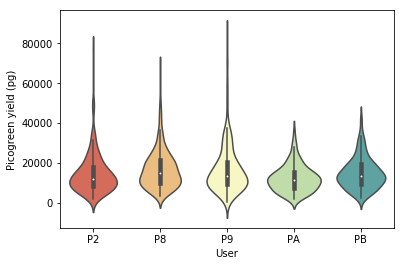

In [9]:
vp = sns.violinplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                    order = ["P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

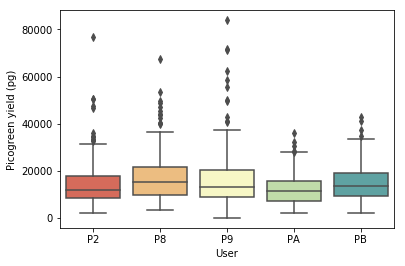

In [10]:
bp = sns.boxplot(x = "User", y = "Picogreen yield (pg)", data = ps[ps["Picogreen yield (pg)"] < 100000], 
                 order = ["P2", "P8", "P9", "PA", "PB"], palette = "Spectral")